# **PART-1**

**Simulate a Function & Train on Actual Tasks**

Loading and preprocessing Data

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

# Load and preprocess the MNIST dataset
(x_train, y_train), (_, _) = datasets.mnist.load_data()
x_train = x_train / 255.0  

subset_size = 100
selected_indices = np.random.choice(len(x_train), size=subset_size, replace=False)

def nonlinear_function(x):
    return x.mean(axis=(1, 2)) + np.random.normal(0, 0.1, size=x.shape[0])

def sigmoid_function(x):
    return 1 / (1 + np.exp(-x.mean(axis=(1, 2))))

y_train_nonlinear = nonlinear_function(x_train[selected_indices])
x_train_nonlinear = x_train[selected_indices]

y_train_sigmoid = sigmoid_function(x_train[selected_indices])
x_train_sigmoid = x_train[selected_indices]

def count_rnn_parameters(model):
    return sum(np.prod(w.shape) for w in model.get_weights())

def create_dnn_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  
        layers.Dense(28, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_cnn_model():
    model = models.Sequential([
        layers.Reshape((28, 28, 1), input_shape=(28, 28)),  
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def create_rnn_model():
    model = models.Sequential([
        layers.Reshape((28, 28), input_shape=(28, 28)),  
        layers.SimpleRNN(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

11490434/11490434 [==============================] - 2s 0us/step


Non-Linear Function

Number of parameters in RNN model: 6017
Number of parameters in adjusted DNN model: 23901
Number of parameters in adjusted CNN model: 346561
4/4 [==============================] - 0s 5ms/step


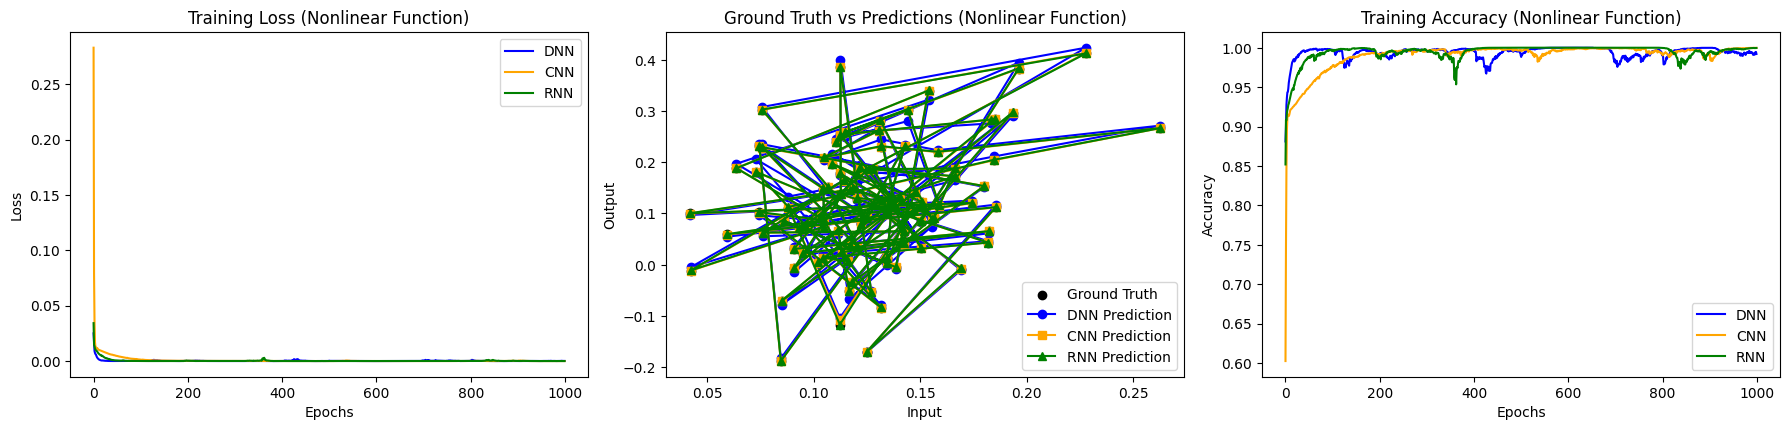

In [ ]:
# Train models for nonlinear function
dnn_model_nonlinear = create_dnn_model()
cnn_model_nonlinear = create_cnn_model()
rnn_model_nonlinear = create_rnn_model()

print("Number of parameters in RNN model:", count_rnn_parameters(rnn_model_nonlinear))
dnn_model_nonlinear = create_dnn_model()
cnn_model_nonlinear = create_cnn_model()
print("Number of parameters in adjusted DNN model:", count_rnn_parameters(dnn_model_nonlinear))
print("Number of parameters in adjusted CNN model:", count_rnn_parameters(cnn_model_nonlinear))

# Train models for nonlinear function
dnn_history_nonlinear = dnn_model_nonlinear.fit(x_train_nonlinear, y_train_nonlinear, epochs=1000, verbose=0)
cnn_history_nonlinear = cnn_model_nonlinear.fit(x_train_nonlinear.reshape(-1, 28, 28, 1), y_train_nonlinear, epochs=1000, verbose=0)
rnn_history_nonlinear = rnn_model_nonlinear.fit(x_train_nonlinear, y_train_nonlinear, epochs=1000, verbose=0)

# Plot training loss and ground truth vs predictions for nonlinear function
plt.figure(figsize=(18, 8))

# Plot training loss for nonlinear function
plt.subplot(2, 3, 1)
plt.plot(dnn_history_nonlinear.history['loss'], label='DNN', color='blue')
plt.plot(cnn_history_nonlinear.history['loss'], label='CNN', color='orange')
plt.plot(rnn_history_nonlinear.history['loss'], label='RNN', color='green')
plt.title('Training Loss (Nonlinear Function)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot ground truth and predictions for nonlinear function
plt.subplot(2, 3, 2)
plt.scatter(x_train_nonlinear.mean(axis=(1, 2)), y_train_nonlinear, label='Ground Truth', color='black')
plt.plot(x_train_nonlinear.mean(axis=(1, 2)), dnn_model_nonlinear.predict(x_train_nonlinear), label='DNN Prediction', color='blue', marker='o')
plt.plot(x_train_nonlinear.mean(axis=(1, 2)), cnn_model_nonlinear.predict(x_train_nonlinear.reshape(-1, 28, 28, 1)), label='CNN Prediction', color='orange', marker='s')
plt.plot(x_train_nonlinear.mean(axis=(1, 2)), rnn_model_nonlinear.predict(x_train_nonlinear), label='RNN Prediction', color='green', marker='^')
plt.title('Ground Truth vs Predictions (Nonlinear Function)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Plot DNN training accuracy for nonlinear function
dnn_acc_nonlinear = 1 - np.array(dnn_history_nonlinear.history['mae'])  
cnn_acc_nonlinear = 1 - np.array(cnn_history_nonlinear.history['mae'])
rnn_acc_nonlinear = 1 - np.array(rnn_history_nonlinear.history['mae'])
plt.subplot(2, 3, 3)
plt.plot(dnn_acc_nonlinear, label='DNN', color='blue')
plt.plot(cnn_acc_nonlinear, label='CNN', color='orange')
plt.plot(rnn_acc_nonlinear, label='RNN', color='green')
plt.title('Training Accuracy (Nonlinear Function)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Sigmoid Function

4/4 [==============================] - 0s 5ms/step


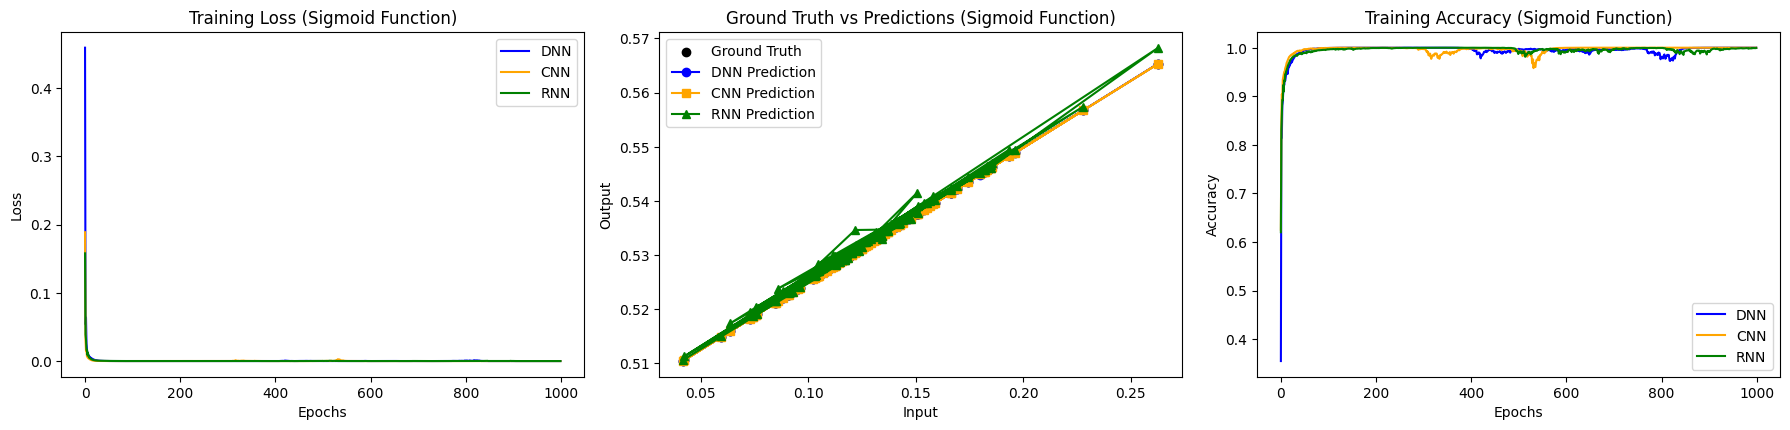

In [ ]:
# Train models for sigmoid function
dnn_model_sigmoid = create_dnn_model()
cnn_model_sigmoid = create_cnn_model()
rnn_model_sigmoid = create_rnn_model()

dnn_history_sigmoid = dnn_model_sigmoid.fit(x_train_sigmoid, y_train_sigmoid, epochs=1000, verbose=0)
cnn_history_sigmoid = cnn_model_sigmoid.fit(x_train_sigmoid.reshape(-1, 28, 28, 1), y_train_sigmoid, epochs=1000, verbose=0)
rnn_history_sigmoid = rnn_model_sigmoid.fit(x_train_sigmoid, y_train_sigmoid, epochs=1000, verbose=0)

# Plot training loss and ground truth vs predictions for sigmoid function
plt.figure(figsize=(18, 8))

# Plot training loss for sigmoid function
plt.subplot(2, 3, 1)
plt.plot(dnn_history_sigmoid.history['loss'], label='DNN', color='blue')
plt.plot(cnn_history_sigmoid.history['loss'], label='CNN', color='orange')
plt.plot(rnn_history_sigmoid.history['loss'], label='RNN', color='green')
plt.title('Training Loss (Sigmoid Function)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot ground truth and predictions for sigmoid function
plt.subplot(2, 3, 2)
plt.scatter(x_train_sigmoid.mean(axis=(1, 2)), y_train_sigmoid, label='Ground Truth', color='black')
plt.plot(x_train_sigmoid.mean(axis=(1, 2)), dnn_model_sigmoid.predict(x_train_sigmoid), label='DNN Prediction', color='blue', marker='o')
plt.plot(x_train_sigmoid.mean(axis=(1, 2)), cnn_model_sigmoid.predict(x_train_sigmoid.reshape(-1, 28, 28, 1)), label='CNN Prediction', color='orange', marker='s')
plt.plot(x_train_sigmoid.mean(axis=(1, 2)), rnn_model_sigmoid.predict(x_train_sigmoid), label='RNN Prediction', color='green', marker='^')
plt.title('Ground Truth vs Predictions (Sigmoid Function)')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Plot DNN training accuracy for sigmoid function
dnn_acc_sigmoid = 1 - np.array(dnn_history_sigmoid.history['mae']) 
cnn_acc_sigmoid = 1 - np.array(cnn_history_sigmoid.history['mae'])
rnn_acc_sigmoid = 1 - np.array(rnn_history_sigmoid.history['mae'])
plt.subplot(2, 3, 3)
plt.plot(dnn_acc_sigmoid, label='DNN', color='blue')
plt.plot(cnn_acc_sigmoid, label='CNN', color='orange')
plt.plot(rnn_acc_sigmoid, label='RNN', color='green')
plt.title('Training Accuracy (Sigmoid Function)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()